# Heat Equation

This notebook uses a C program to solve the heat equation
$$
\partial_t u = \kappa \partial_{xx} u
$$
and then visualizes the results

## Test and Visualize Results

#### Load various modules and set defaults

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'

#### Run the test

In [2]:
!cd build && ./test_heat_eqn

#### Plot the test results

The left plot shows the original function (cosine). You may notice that ghost cells haven't been set yet. The right plot shows the second derivative of the function (dots), as well as the expected result (negative cosine, solid line).

In [3]:
df = pd.read_csv("build/f.csv", names=("x", "f", "rhs", "ref"))
df

,x,f,rhs,ref
0,0.000000,1.000000,-177.662000,-0.700000
1,0.062832,0.998027,-0.698389,-0.698619
2,0.125664,0.992115,-0.694252,-0.694480
3,0.188496,0.982287,-0.687375,-0.687601
4,0.251327,0.968583,-0.677785,-0.678008
...,...,...,...,...
95,5.969030,0.951057,-0.665521,-0.665740
96,6.031860,0.968583,-0.677785,-0.678008
97,6.094690,0.982287,-0.687375,-0.687601
98,6.157520,0.992115,-0.694252,-0.694480


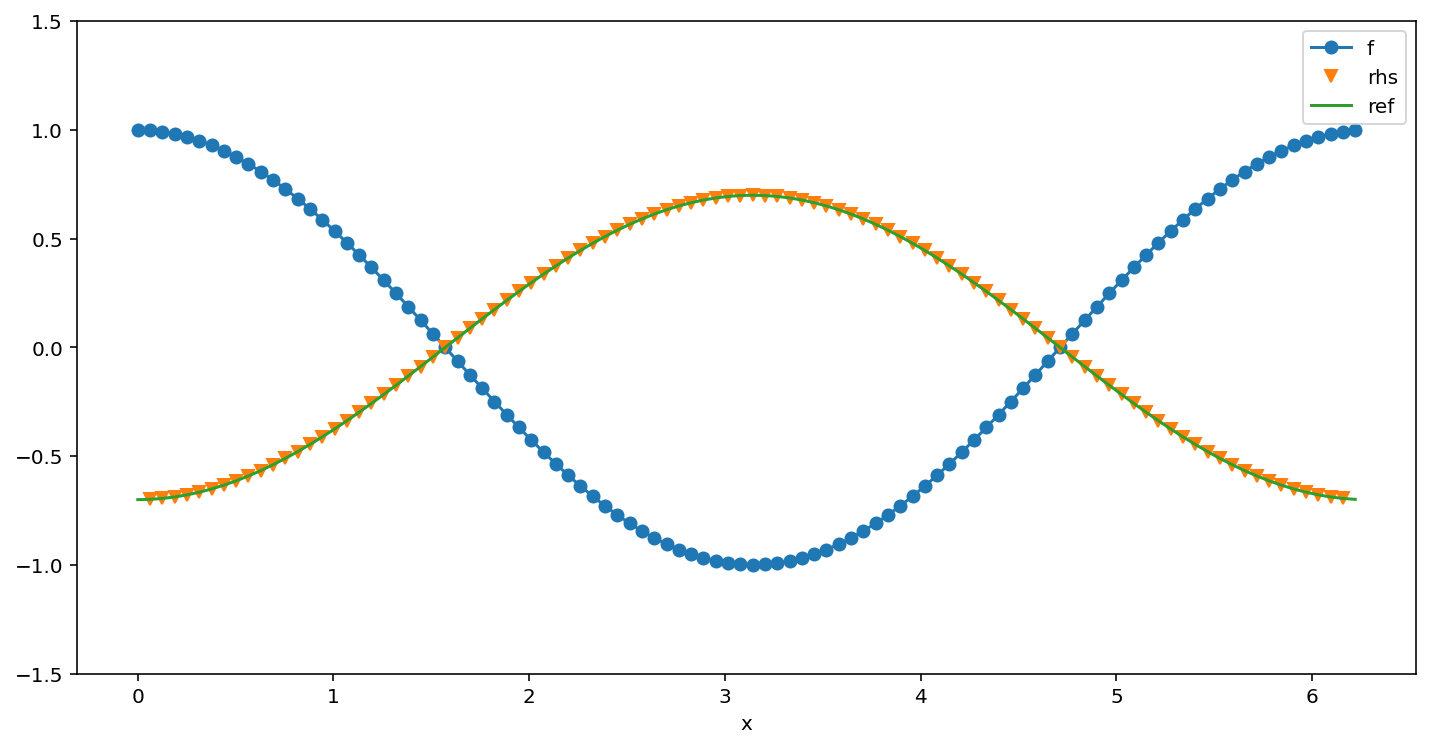

In [4]:
ax = df.plot(x="x", y="f", label="f", style='-o')
df.plot(x="x", y="rhs", label="rhs", style='v', ylim=(-1.5, 1.5), ax=ax)
df.plot(x="x", y="ref", label="ref", style='-', ax=ax);

#### Run the heat equation solver

In [5]:
!cd build && ./heat_eqn_solve

#### Plot the initial condition

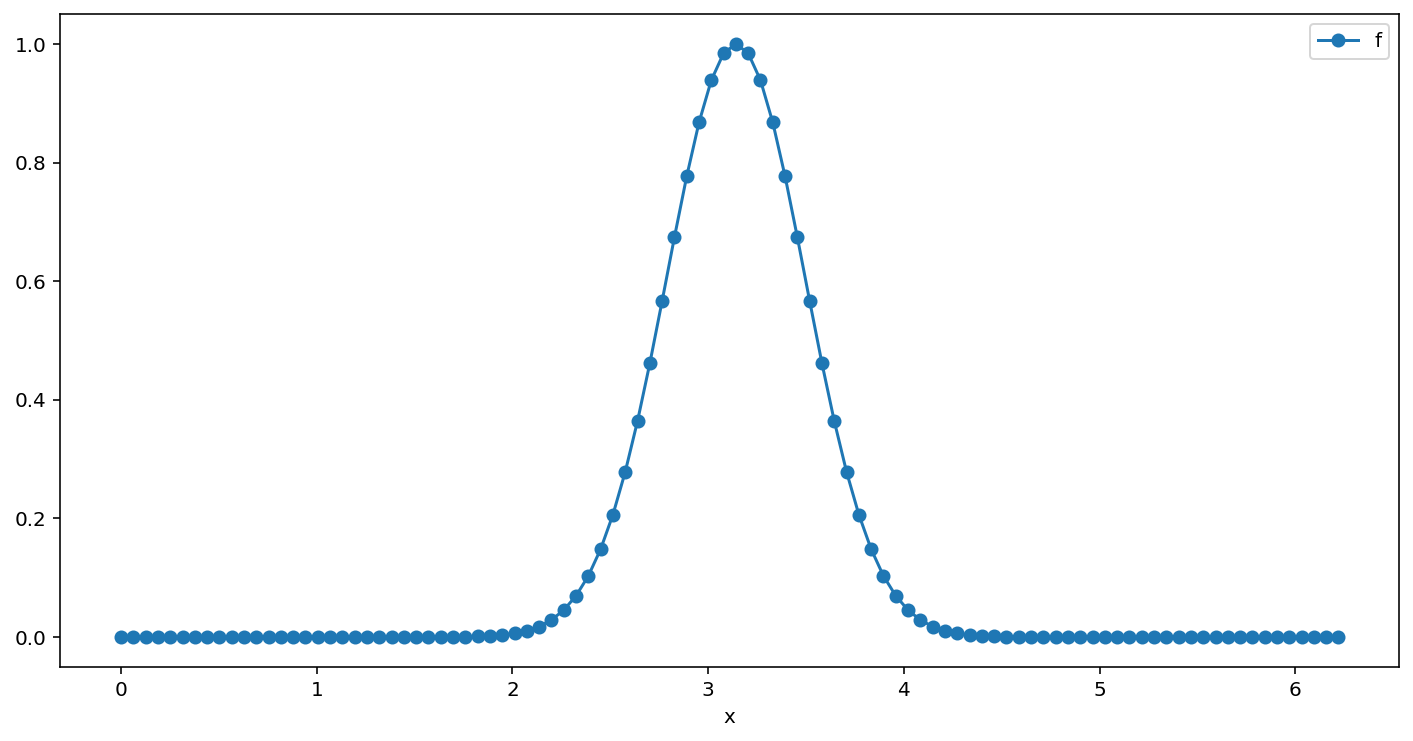

In [6]:
df = pd.read_csv("build/f0.csv", names=("x", "f"))
df.plot(x="x", y="f", style="o-");

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 1)

line, = ax.plot([], [], lw=2)
plt.close()

In [8]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    df = pd.read_csv("build/f{}.csv".format(i*10), names=("x", "f"))
    line.set_data(df["x"], df["f"])
    return (line,)

#### Show an animation of the time evolution of the solution

In [9]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=200, blit=True)